In [2]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

2.12.0


In [3]:
(training_images) = tfds.as_numpy(tfds.load('citrus_leaves', split = ['train'], batch_size=-1, as_supervised=True))

In [4]:
(training_images) = tfds.as_numpy(tfds.load('citrus_leaves', split = ['train'], batch_size=-1, as_supervised=True))

In [5]:
(training_images1, training_labels) = (training_images[0])

In [6]:
test_img = training_images1[593:]
training_images1 = training_images1[:-1]

In [7]:
test_labels = training_labels[593:]
training_labels = training_labels[:-1]

In [23]:
(training_images1.shape)

(592, 256, 256, 3)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

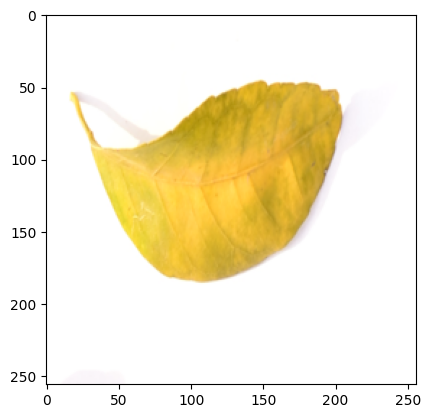

In [19]:
i = 43
plt.imshow(training_images1[i])


Image Augmentation

In [8]:
  inputsx = tf.keras.layers.RandomFlip("horizontal")(training_images1)
  #x = tf.keras.layers.RandomCrop()(x)
  x = tf.keras.layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=0.2)(inputsx)
  x = tf.keras.layers.RandomRotation(0.1)(x)
  x = tf.keras.layers.RandomZoom(0.2)(x)

In [9]:
aug_imgs = tf.cast(x,dtype='uint8')

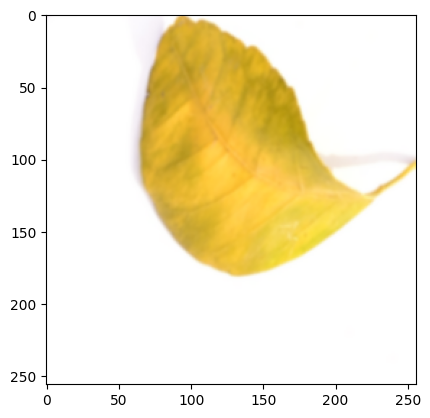

In [20]:
plt.imshow(aug_imgs[i])

In [38]:

inputs = tf.keras.Input(shape=(256,256, 3))

#x = tf.cast(inputs, dtype = 'int32')
x = tf.keras.layers.Rescaling(1./255)(inputs)

# Augmentation
#x = tf.keras.layers.RandomFlip("horizontal")(x)
#x = tf.keras.layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=0.2)(x)
#x = tf.keras.layers.RandomRotation(0.1)(x)
#x = tf.keras.layers.RandomZoom(0.2)(x)

#CNN
x = tf.keras.layers.Conv2D(128, (2,2),strides = 2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(128, (3,3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)

#x = tf.keras.layers.Conv2D(32, (3,3), use_bias=False)(x)
#x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Flatten()(x)


#Dense
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

In [39]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [47]:
callbacks_list = [
  #tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=12, restore_best_weights=True),
  tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint_path13.keras", monitor="val_accuracy", save_best_only=True,),
  tf.keras.callbacks.TensorBoard(log_dir="./logs13")
]

In [41]:
history = model.fit(x = aug_imgs, y = training_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[callbacks_list])

Epoch 1/5
15/15 [==============================] - 119s 8s/step - loss: 4.2633 - accuracy: 0.3017 - val_loss: 1.3554 - val_accuracy: 0.3025
Epoch 2/5
15/15 [==============================] - 120s 8s/step - loss: 1.3568 - accuracy: 0.3776 - val_loss: 1.3680 - val_accuracy: 0.3109
Epoch 3/5
15/15 [==============================] - 117s 8s/step - loss: 1.1971 - accuracy: 0.4620 - val_loss: 1.2569 - val_accuracy: 0.4538
Epoch 4/5
15/15 [==============================] - 122s 8s/step - loss: 1.0204 - accuracy: 0.5127 - val_loss: 2.7322 - val_accuracy: 0.2857
Epoch 5/5
15/15 [==============================] - 129s 9s/step - loss: 1.0181 - accuracy: 0.6013 - val_loss: 2.9711 - val_accuracy: 0.3193


In [43]:
history = model.fit(x = aug_imgs, y = training_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[callbacks_list])

Epoch 1/5
15/15 [==============================] - 119s 8s/step - loss: 0.7469 - accuracy: 0.6582 - val_loss: 3.2335 - val_accuracy: 0.2857
Epoch 2/5
15/15 [==============================] - 113s 8s/step - loss: 0.7189 - accuracy: 0.6624 - val_loss: 3.3566 - val_accuracy: 0.3025
Epoch 3/5
15/15 [==============================] - 117s 8s/step - loss: 0.6151 - accuracy: 0.7278 - val_loss: 4.9482 - val_accuracy: 0.3782
Epoch 4/5
15/15 [==============================] - 126s 8s/step - loss: 0.7292 - accuracy: 0.6751 - val_loss: 9.1954 - val_accuracy: 0.3529
Epoch 5/5
15/15 [==============================] - 126s 8s/step - loss: 0.6568 - accuracy: 0.7046 - val_loss: 5.4207 - val_accuracy: 0.3782


In [45]:
history = model.fit(x = aug_imgs, y = training_labels, epochs=15, validation_split=0.2, batch_size=32, callbacks=[callbacks_list])

Epoch 1/15
15/15 [==============================] - 128s 8s/step - loss: 0.5357 - accuracy: 0.7743 - val_loss: 5.6833 - val_accuracy: 0.3866
Epoch 2/15
15/15 [==============================] - 119s 8s/step - loss: 0.5494 - accuracy: 0.7489 - val_loss: 3.2264 - val_accuracy: 0.4622
Epoch 3/15
15/15 [==============================] - 119s 8s/step - loss: 0.5541 - accuracy: 0.7300 - val_loss: 5.4444 - val_accuracy: 0.3950
Epoch 4/15
15/15 [==============================] - 118s 8s/step - loss: 0.8554 - accuracy: 0.7152 - val_loss: 2.2658 - val_accuracy: 0.4118
Epoch 5/15
15/15 [==============================] - 125s 8s/step - loss: 0.4894 - accuracy: 0.7806 - val_loss: 6.1613 - val_accuracy: 0.4034
Epoch 6/15
15/15 [==============================] - 116s 8s/step - loss: 0.4876 - accuracy: 0.7848 - val_loss: 6.5914 - val_accuracy: 0.4034
Epoch 7/15
15/15 [==============================] - 110s 7s/step - loss: 0.4075 - accuracy: 0.8165 - val_loss: 12.5368 - val_accuracy: 0.3445
Epoch 8/15
1

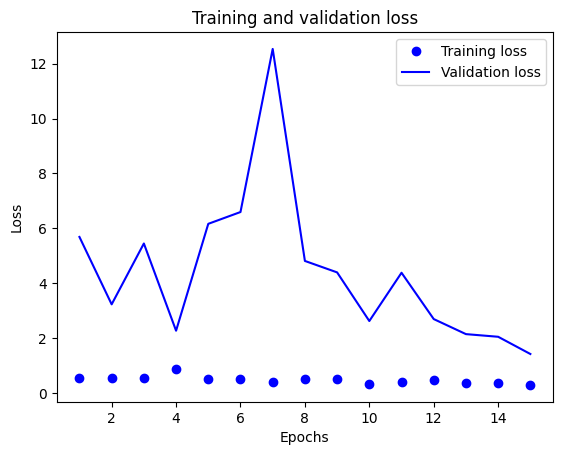

In [46]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [48]:
history1 = model.fit(x = aug_imgs, y = training_labels, epochs=15, validation_split=0.2, batch_size=32, callbacks=[callbacks_list])

Epoch 1/15
15/15 [==============================] - 123s 8s/step - loss: 0.4277 - accuracy: 0.8481 - val_loss: 2.2718 - val_accuracy: 0.4286
Epoch 2/15
15/15 [==============================] - 122s 8s/step - loss: 0.2573 - accuracy: 0.8924 - val_loss: 4.8624 - val_accuracy: 0.2857
Epoch 3/15
15/15 [==============================] - 108s 7s/step - loss: 0.4096 - accuracy: 0.8671 - val_loss: 2.4420 - val_accuracy: 0.4958
Epoch 4/15
15/15 [==============================] - 107s 7s/step - loss: 0.2840 - accuracy: 0.9030 - val_loss: 5.0759 - val_accuracy: 0.4202
Epoch 5/15
15/15 [==============================] - 113s 8s/step - loss: 0.3102 - accuracy: 0.8819 - val_loss: 3.2647 - val_accuracy: 0.3950
Epoch 6/15
15/15 [==============================] - 115s 8s/step - loss: 0.2106 - accuracy: 0.9135 - val_loss: 3.5603 - val_accuracy: 0.4958
Epoch 7/15
15/15 [==============================] - 105s 7s/step - loss: 0.3138 - accuracy: 0.8924 - val_loss: 0.8856 - val_accuracy: 0.6555
Epoch 8/15
15

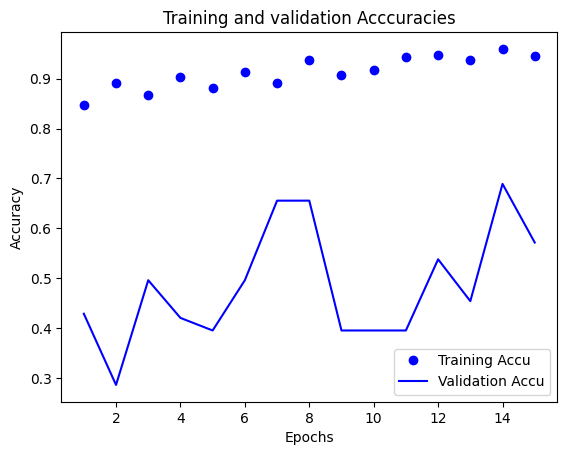

In [58]:
history_dict1 = history1.history
loss_values1 = history_dict1["accuracy"]
val_loss_values1 = history_dict1["val_accuracy"]
epochs1 = range(1, len(loss_values1) + 1)
plt.plot(epochs1, loss_values1, "bo", label="Training Accu")
plt.plot(epochs1, val_loss_values1, "b", label="Validation Accu")
plt.title("Training and validation Acccuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
layer_outputs = []
for layer in model.layers:
  if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D)):
    layer_outputs.append(layer.output)

activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

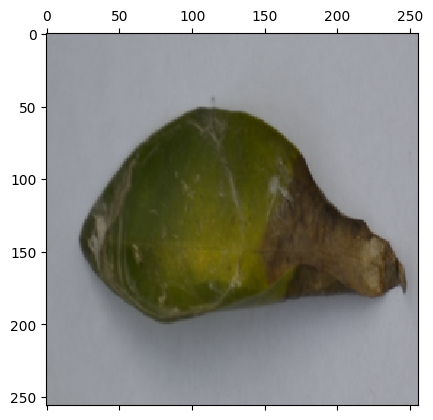

In [54]:
plt.matshow(test_img[0])

1/1 [==============================] - 0s 103ms/step


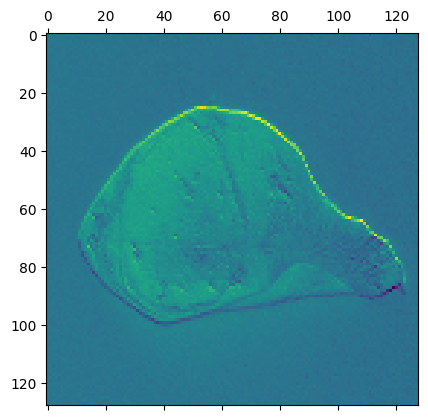

In [53]:
activations = activation_model.predict(test_img)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 5])#, cmap="viridis")

In [66]:
model.predict(test_img).argmax()

1/1 [==============================] - 0s 95ms/step


2

In [65]:
test_labels[0]

0

Model Wrong With Very High Certainity: Seems it is confusing Black Spots with Greening, Let's check out some pics ourselves

In [72]:
black_spots_indices = []
#[spots.append(i) lambda i: for i in training_labels if i==2]

In [73]:

for i,j in enumerate(training_labels):
  if j==2:
    black_spots_indices.append(i)

In [78]:
black_spots_imgs = training_images1[black_spots_indices]

In [81]:
black_spots_imgs.shape
len(black_spots_indices)

204

In [75]:
training_labels[41]
#black_spots_indices

2

In [77]:
greening_indices = []
for i,j in enumerate(training_labels):
  if j==0:
    greening_indices.append(i)

In [82]:
greening_imgs = training_images1[greening_indices]

Text(0.5, 1.0, 'Black Spot Images')

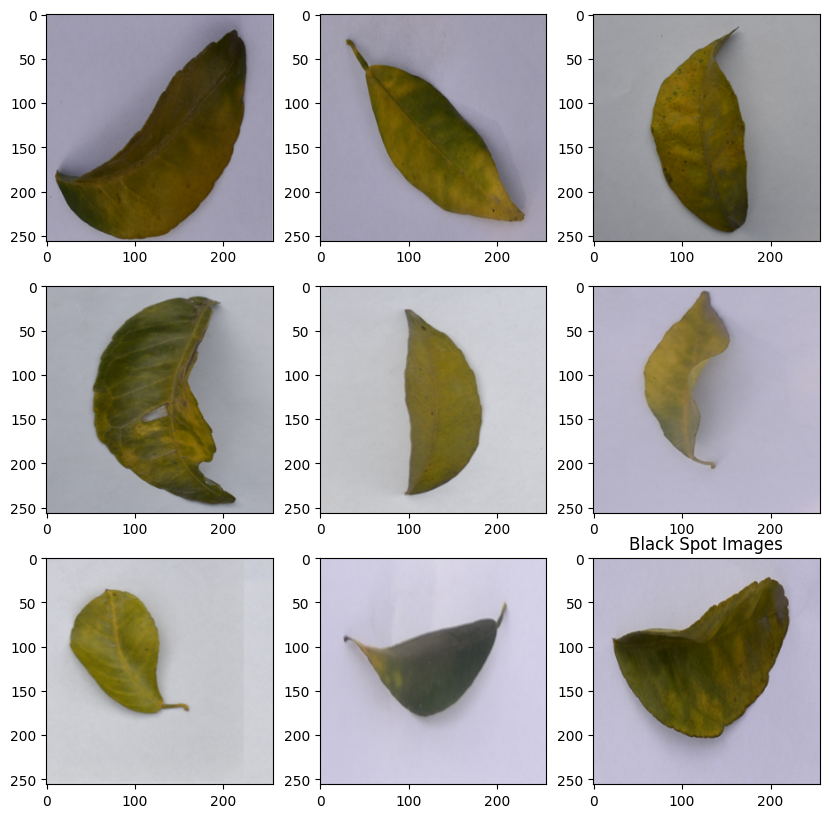

In [87]:
#plt.title("Black Spot Images")
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(black_spots_imgs[i])
plt.title("Black Spot Images")


Text(0.5, 1.0, 'Greening Images')

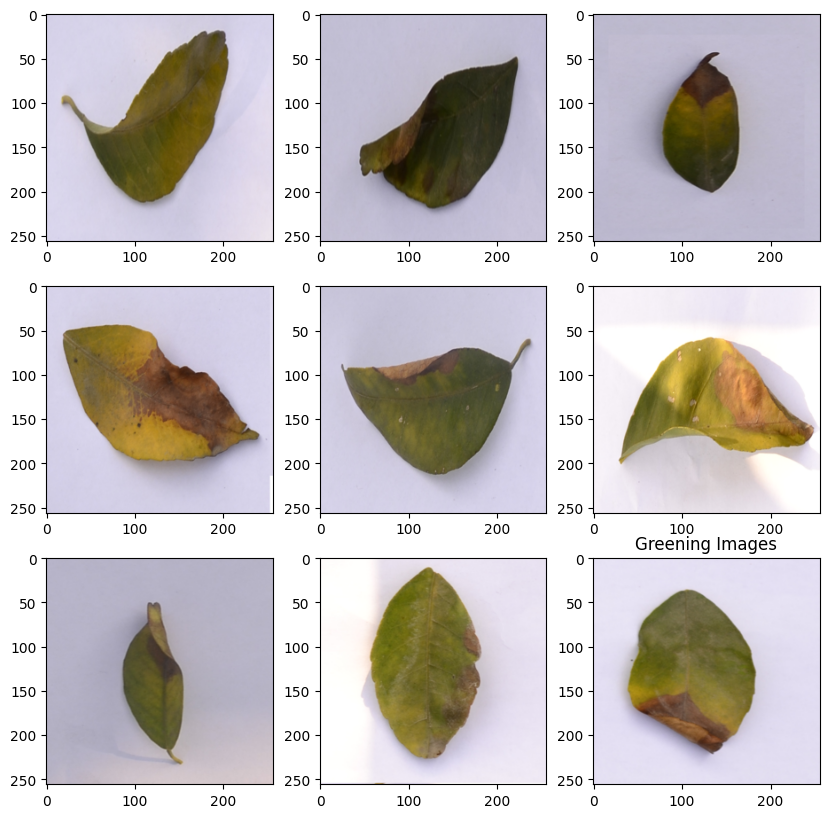

In [92]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(greening_imgs[i])
plt.title("Greening Images")

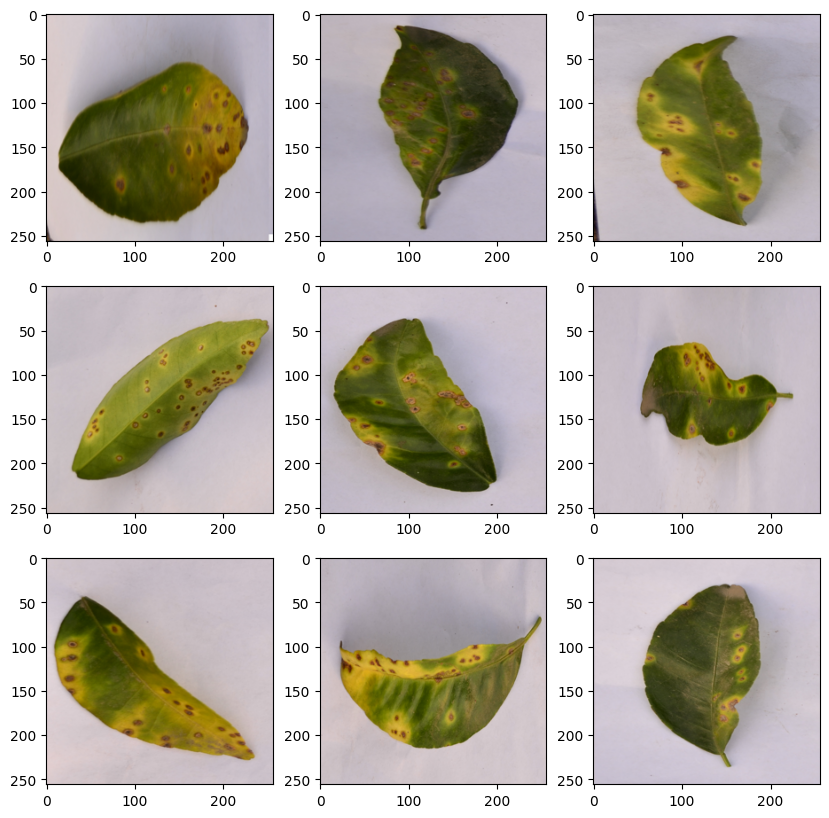

In [90]:
one_indices = []
for i,j in enumerate(training_labels):
  if j==1:
    one_indices.append(i)


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(training_images1[one_indices][i])

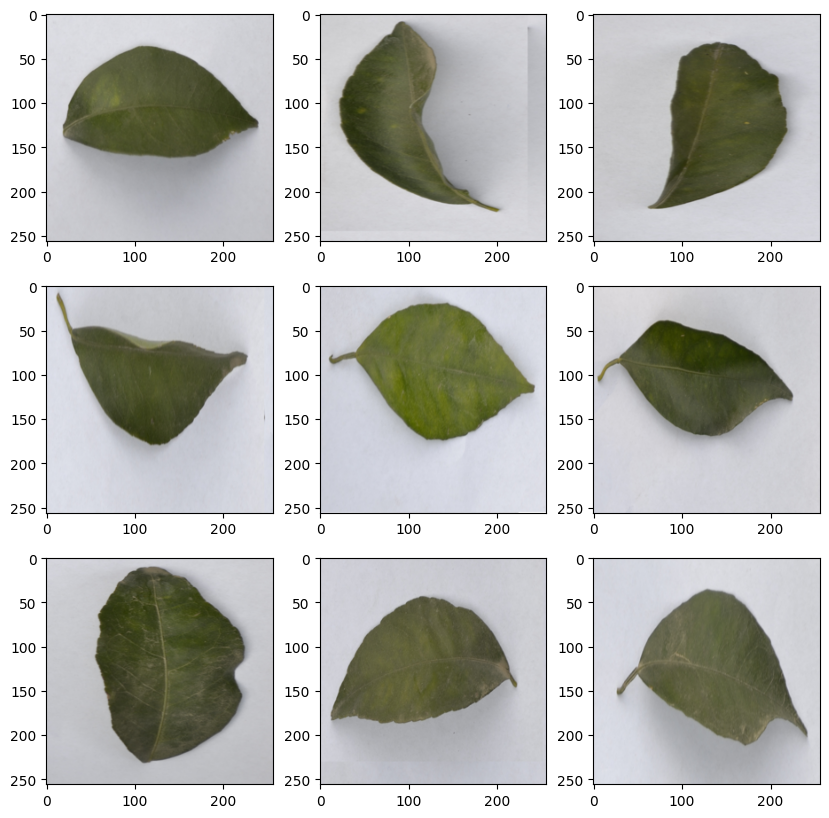

In [91]:
three_indices = []
for i,j in enumerate(training_labels):
  if j==3:
    three_indices.append(i)


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(training_images1[three_indices][i])

Seems 100-200 px Filters are missing Will add them in next ipynb.... Subscribe

In [59]:
!zip -r /content/logs1.zip /content/logs1


  adding: content/logs1/ (stored 0%)
  adding: content/logs1/validation/ (stored 0%)
  adding: content/logs1/validation/events.out.tfevents.1692630702.78a041bdb3c1.17555.9.v2 (deflated 66%)
  adding: content/logs1/train/ (stored 0%)
  adding: content/logs1/train/events.out.tfevents.1692630590.78a041bdb3c1.17555.8.v2 (deflated 89%)


In [60]:
!zip -r /content/logs11.zip /content/logs11

  adding: content/logs11/ (stored 0%)
  adding: content/logs11/validation/ (stored 0%)
  adding: content/logs11/validation/events.out.tfevents.1692631323.78a041bdb3c1.17555.11.v2 (deflated 65%)
  adding: content/logs11/train/ (stored 0%)
  adding: content/logs11/train/events.out.tfevents.1692631215.78a041bdb3c1.17555.10.v2 (deflated 89%)


In [61]:
!zip -r /content/logs12.zip /content/logs12

  adding: content/logs12/ (stored 0%)
  adding: content/logs12/validation/ (stored 0%)
  adding: content/logs12/validation/events.out.tfevents.1692632017.78a041bdb3c1.17555.13.v2 (deflated 74%)
  adding: content/logs12/train/ (stored 0%)
  adding: content/logs12/train/events.out.tfevents.1692631899.78a041bdb3c1.17555.12.v2 (deflated 89%)


In [62]:
!zip -r /content/logs13.zip /content/logs13

  adding: content/logs13/ (stored 0%)
  adding: content/logs13/validation/ (stored 0%)
  adding: content/logs13/validation/events.out.tfevents.1692634047.78a041bdb3c1.17555.15.v2 (deflated 75%)
  adding: content/logs13/train/ (stored 0%)
  adding: content/logs13/train/events.out.tfevents.1692633935.78a041bdb3c1.17555.14.v2 (deflated 89%)
